In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data files
ride_data_orig = "Resources/Metro_Bike_Share_Trip_Data.csv"
ride_data_17_Q2 = "Resources/la_metro_gbfs_trips_Q2_2017.csv"
ride_data_17_Q3 = "Resources/metro-bike-share-trips-2017-q3.csv"
ride_data_17_Q4 = "Resources/metro-bike-share-trips-2017-q4-v2.csv"
ride_data_18_Q1 = "Resources/metro-bike-share-trips-2018-q1.csv"
weather_data = "Resources/la_weather_2016_2018.csv"

ride_orig_df = pd.read_csv(ride_data_orig, low_memory=False)
ride_17_Q2_df = pd.read_csv(ride_data_17_Q2, low_memory=False)
ride_17_Q3_df = pd.read_csv(ride_data_17_Q3, low_memory=False)
ride_17_Q4_df = pd.read_csv(ride_data_17_Q4, low_memory=False)
ride_18_Q1_df = pd.read_csv(ride_data_18_Q1, low_memory=False)
weather_data_df = pd.read_csv(weather_data, low_memory=False)

# Make the start time column headers the same
ride_orig_df.rename(columns={'Start Time':'start_time'}, inplace=True)

# Drop columns that aren't needed (leaving some for future analysis)
# Note (Starting Lat-Long and Ending Lat-Long) do not exist in the newer data
ride_orig_df.drop(['Starting Station Latitude', 'Starting Station Longitude', 'Ending Station Latitude',
                   'Ending Station Longitude','Starting Lat-Long', 'Ending Lat-Long'], axis=1, inplace=True)
ride_17_Q2_df.drop(['start_lat', 'start_lon', 'end_lat', 'end_lon'], axis=1, inplace=True)
ride_17_Q3_df.drop(['start_lat', 'start_lon', 'end_lat', 'end_lon'], axis=1, inplace=True)
ride_17_Q4_df.drop(['start_lat', 'start_lon', 'end_lat', 'end_lon'], axis=1, inplace=True)
ride_18_Q1_df.drop(['start_lat', 'start_lon', 'end_lat', 'end_lon'], axis=1, inplace=True)

# Drop rows that have any NaN values
ride_orig_df = ride_orig_df.dropna()
ride_17_Q2_df = ride_17_Q2_df.dropna()
ride_17_Q3_df = ride_17_Q3_df.dropna()
ride_17_Q4_df = ride_17_Q4_df.dropna()
ride_18_Q1_df = ride_18_Q1_df.dropna()

# Convert to datetime objects (first dataframe contains data from 7/16 to 3/17)
ride_orig_df['start_time'] = pd.to_datetime(ride_orig_df['start_time'], format='%m/%d/%Y %I:%M:%S %p')
ride_17_Q2_df['start_time'] = pd.to_datetime(ride_17_Q2_df['start_time'], format='%m/%d/%y %H:%M')
ride_17_Q3_df['start_time'] = pd.to_datetime(ride_17_Q3_df['start_time'], format='%m/%d/%y %H:%M')
ride_17_Q4_df['start_time'] = pd.to_datetime(ride_17_Q4_df['start_time'], format='%m/%d/%y %H:%M')
ride_18_Q1_df['start_time'] = pd.to_datetime(ride_18_Q1_df['start_time'], format='%m/%d/%y %H:%M')

# Add columns to original data so can be split out by year and month
ride_orig_df['Month'] = ride_orig_df['start_time'].dt.month
ride_orig_df['Year'] = ride_orig_df['start_time'].dt.year


In [2]:
# Bin defines

# 12am-6:30, 6:30-11:00, 11:00-2:00, 2:00-5:30, 5:30-7:30, 7:30-11:00, 11:00-12am
bins = [0, 390, 660, 840, 1050, 1170, 1380, 1440]

# Create the names for the bins
group_names = ['am_night (12am-6:30am)', 'morning (6:30am-11am)', 'lunch (11am-2pm)',
               'afternoon (2pm-5:30pm)', 'pm rush (5:30pm-7:30pm)', 'evening (7:30pm-11pm)', 'pm_night (11pm-12am)']


In [3]:
### Create a column in the dataframes to enable binning.
### Convert the time to total minutes (seconds are ignored)
### Create dataframs for each quarter

# Splitup original data file into 3 quarters
# Get 2016 data
ride_2106_df = ride_orig_df.loc[ride_orig_df['Year'] == 2016]

# Get Months
ride_2106_16_7_df = ride_2106_df.loc[ride_2106_df['Month'] == 7]
ride_2106_16_8_df = ride_2106_df.loc[ride_2106_df['Month'] == 8]
ride_2106_16_9_df = ride_2106_df.loc[ride_2106_df['Month'] == 9]
ride_2106_16_10_df = ride_2106_df.loc[ride_2106_df['Month'] == 10]
ride_2106_16_11_df = ride_2106_df.loc[ride_2106_df['Month'] == 11]
ride_2106_16_12_df = ride_2106_df.loc[ride_2106_df['Month'] == 12]

# Create 2016 quarters total minutes dataframes
frames = [ride_2106_16_7_df, ride_2106_16_7_df, ride_2106_16_7_df]
ride_16_Q3_df = pd.concat(frames, ignore_index=True, sort=False).copy()

frames = [ride_2106_16_10_df, ride_2106_16_11_df, ride_2106_16_12_df]
ride_16_Q4_df = pd.concat(frames, ignore_index=True, sort=False).copy()

# Get 2017 data
ride_17_Q1_df = ride_orig_df.loc[ride_orig_df['Year'] == 2017].copy()

# Get total minutes
total_minutes_16_Q3 = ride_16_Q3_df['start_time'].dt.minute + (ride_16_Q3_df['start_time'].dt.hour * 60)
total_minutes_16_Q4 = ride_16_Q4_df['start_time'].dt.minute + (ride_16_Q4_df['start_time'].dt.hour * 60)
total_minutes_17_Q1 = ride_17_Q1_df['start_time'].dt.minute + (ride_17_Q1_df['start_time'].dt.hour * 60)
total_minutes_17_Q2 = ride_17_Q2_df['start_time'].dt.minute + (ride_17_Q2_df['start_time'].dt.hour * 60)
total_minutes_17_Q3 = ride_17_Q3_df['start_time'].dt.minute + (ride_17_Q3_df['start_time'].dt.hour * 60)
total_minutes_17_Q4 = ride_17_Q4_df['start_time'].dt.minute + (ride_17_Q4_df['start_time'].dt.hour * 60)
total_minutes_18_Q1 = ride_18_Q1_df['start_time'].dt.minute + (ride_18_Q1_df['start_time'].dt.hour * 60)

# Create dataframes
total_minutes_16_Q3_df = pd.DataFrame(total_minutes_16_Q3)
total_minutes_16_Q4_df = pd.DataFrame(total_minutes_16_Q4)
total_minutes_17_Q1_df = pd.DataFrame(total_minutes_17_Q1)
total_minutes_17_Q2_df = pd.DataFrame(total_minutes_17_Q2)
total_minutes_17_Q3_df = pd.DataFrame(total_minutes_17_Q3)
total_minutes_17_Q4_df = pd.DataFrame(total_minutes_17_Q4)
total_minutes_18_Q1_df = pd.DataFrame(total_minutes_18_Q1)


In [4]:
### Binning
### 2016 Q3

# Renaming to make sure things are clear
total_minutes_16_Q3_df.rename(columns={'start_time':'time_in_minutes'}, inplace=True)

total_minutes_16_Q3_df_cut = total_minutes_16_Q3_df.copy()
total_minutes_16_Q3_df_cut["time_of_day"] = pd.cut(total_minutes_16_Q3_df_cut["time_in_minutes"], bins, labels=group_names)

# Now group up the times of day
groupedby_time_of_day_cut = total_minutes_16_Q3_df_cut.groupby('time_of_day')

# Create dataframe
binned_16_Q3_df = pd.DataFrame(groupedby_time_of_day_cut.count())


In [5]:
### Binning
### 2016 Q4

# Renaming to make sure things are clear
total_minutes_16_Q4_df.rename(columns={'start_time':'time_in_minutes'}, inplace=True)

total_minutes_16_Q4_df_cut = total_minutes_16_Q4_df.copy()
total_minutes_16_Q4_df_cut["time_of_day"] = pd.cut(total_minutes_16_Q4_df_cut["time_in_minutes"], bins, labels=group_names)

# Now group up the times of day
groupedby_time_of_day_cut = total_minutes_16_Q4_df_cut.groupby('time_of_day')

# Create dataframe
binned_16_Q4_df = pd.DataFrame(groupedby_time_of_day_cut.count())


In [6]:
### Binning
### 2017 Q1

# Renaming to make sure things are clear
total_minutes_17_Q1_df.rename(columns={'start_time':'time_in_minutes'}, inplace=True)

total_minutes_17_Q1_df_cut = total_minutes_17_Q1_df.copy()
total_minutes_17_Q1_df_cut["time_of_day"] = pd.cut(total_minutes_17_Q1_df_cut["time_in_minutes"], bins, labels=group_names)

# Now group up the times of day
groupedby_time_of_day_cut = total_minutes_17_Q1_df_cut.groupby('time_of_day')

# Create dataframe
binned_17_Q1_df = pd.DataFrame(groupedby_time_of_day_cut.count())


In [7]:
### Binning
### 2017 Q2

# Renaming to make sure things are clear
total_minutes_17_Q2_df.rename(columns={'start_time':'time_in_minutes'}, inplace=True)

total_minutes_17_Q2_df_cut = total_minutes_17_Q2_df.copy()
total_minutes_17_Q2_df_cut["time_of_day"] = pd.cut(total_minutes_17_Q2_df_cut["time_in_minutes"], bins, labels=group_names)

# Now group up the times of day
groupedby_time_of_day_cut = total_minutes_17_Q2_df_cut.groupby('time_of_day')

# Create dataframe
binned_17_Q2_df = pd.DataFrame(groupedby_time_of_day_cut.count())


In [8]:
### Binning
### 2017 Q3

# Renaming to make sure things are clear
total_minutes_17_Q3_df.rename(columns={'start_time':'time_in_minutes'}, inplace=True)

total_minutes_17_Q3_df_cut = total_minutes_17_Q3_df.copy()
total_minutes_17_Q3_df_cut["time_of_day"] = pd.cut(total_minutes_17_Q3_df_cut["time_in_minutes"], bins, labels=group_names)

# Now group up the times of day
groupedby_time_of_day_cut = total_minutes_17_Q3_df_cut.groupby('time_of_day')

# Create dataframe
binned_17_Q3_df = pd.DataFrame(groupedby_time_of_day_cut.count())


In [9]:
### Binning
### 2017 Q4

# Renaming to make sure things are clear
total_minutes_17_Q4_df.rename(columns={'start_time':'time_in_minutes'}, inplace=True)

total_minutes_17_Q4_df_cut = total_minutes_17_Q2_df.copy()
total_minutes_17_Q4_df_cut["time_of_day"] = pd.cut(total_minutes_17_Q4_df_cut["time_in_minutes"], bins, labels=group_names)

# Now group up the times of day
groupedby_time_of_day_cut = total_minutes_17_Q4_df_cut.groupby('time_of_day')

# Create dataframe
binned_17_Q4_df = pd.DataFrame(groupedby_time_of_day_cut.count())


In [10]:
### Binning
### 2018 Q1

# Renaming to make sure things are clear
total_minutes_18_Q1_df.rename(columns={'start_time':'time_in_minutes'}, inplace=True)

total_minutes_18_Q1_df_cut = total_minutes_18_Q1_df.copy()
total_minutes_18_Q1_df_cut["time_of_day"] = pd.cut(total_minutes_18_Q1_df_cut["time_in_minutes"], bins, labels=group_names)

# Now group up the times of day
groupedby_time_of_day_cut = total_minutes_18_Q1_df_cut.groupby('time_of_day')

# Create dataframe
binned_18_Q1_df = pd.DataFrame(groupedby_time_of_day_cut.count())


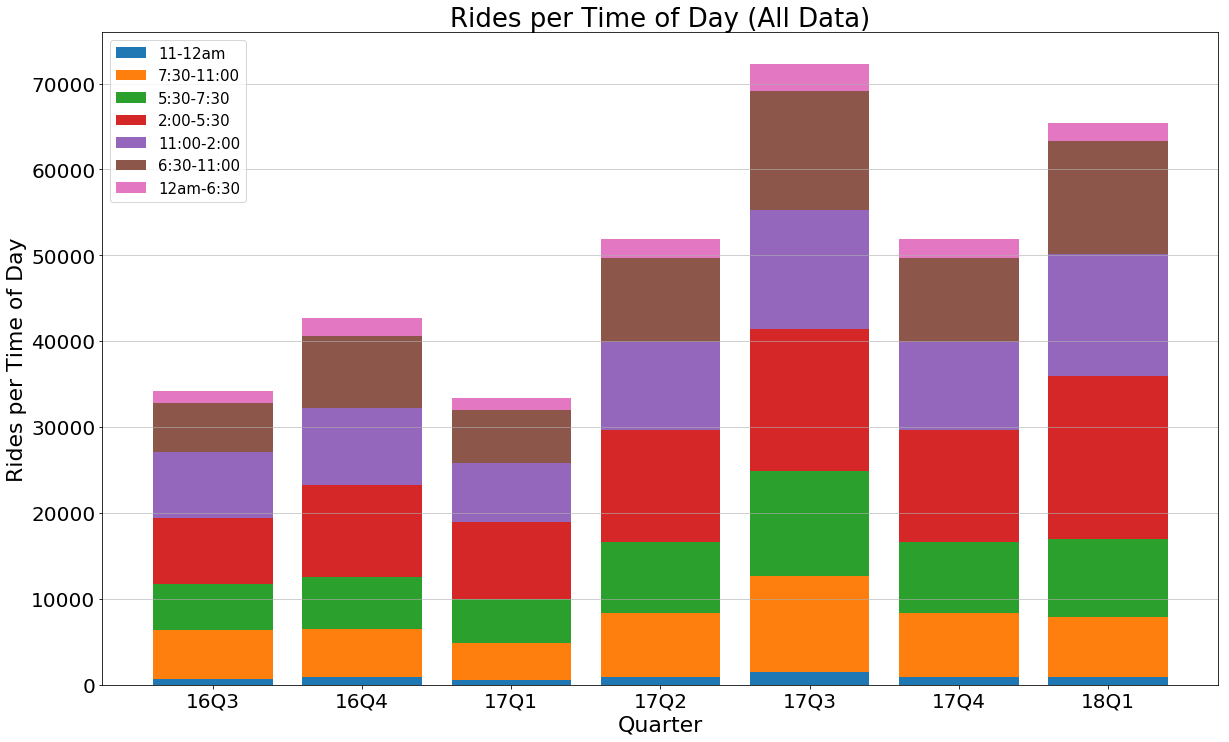

In [14]:
### Combine the quarter DFs
### And pull out rows to plot stacked bar chart
new_16_3_4_df = binned_16_Q3_df.join(binned_16_Q4_df, lsuffix='_16_Q3', rsuffix='_16_Q4')
new_16_17_1_df = new_16_3_4_df.join(binned_17_Q1_df, lsuffix='_17_Q1', rsuffix='_17_Q1')
new_16_17_1_2_df = new_16_17_1_df.join(binned_17_Q2_df, lsuffix='_17_Q1', rsuffix='_17_Q2')
new_16_17_1_2_3_df = new_16_17_1_2_df.join(binned_17_Q3_df, lsuffix='_17_Q2', rsuffix='_17_Q3')
new_16_17_1_2_3_4_df = new_16_17_1_2_3_df.join(binned_17_Q4_df, lsuffix='_17_Q3', rsuffix='_17_Q4')
all_bins_df = new_16_17_1_2_3_4_df.join(binned_18_Q1_df, lsuffix='_17_Q3', rsuffix='_18_Q4')

# Get the rows as lists
list_of_rows = all_bins_df.values.tolist()

# Get the lists for plotting
pm_night =  np.array(list_of_rows[6])
evening =   np.array(list_of_rows[5])
pm_rush =   np.array(list_of_rows[4])
afternoon = np.array(list_of_rows[3])
lunch =     np.array(list_of_rows[2])
morning =   np.array(list_of_rows[1])
am_night =  np.array(list_of_rows[0])

x_axis = ['16Q3', '16Q4', '17Q1', '17Q2', '17Q3', '17Q4', '18Q1']

# Plotting time!
p1 = plt.bar(x_axis, pm_night, 0.8, label="11-12am")
p2 = plt.bar(x_axis, evening, 0.8, label="7:30-11:00", bottom=pm_night)
p3 = plt.bar(x_axis, pm_rush, 0.8, label="5:30-7:30", bottom=pm_night+evening)
p4 = plt.bar(x_axis, afternoon, 0.8, label="2:00-5:30", bottom=pm_night+evening+pm_rush)
p5 = plt.bar(x_axis, lunch, 0.8, label="11:00-2:00", bottom=pm_night+evening+pm_rush+afternoon)
p6 = plt.bar(x_axis, morning, 0.8, label="6:30-11:00", bottom=pm_night+evening+pm_rush+afternoon+lunch)
p7 = plt.bar(x_axis, am_night, 0.8, label="12am-6:30", bottom=pm_night+evening+pm_rush+afternoon+lunch+morning)

plt.grid(axis='y', alpha=0.75)
plt.xlabel("Quarter", fontsize = 22)
plt.ylabel("Rides per Time of Day", fontsize = 22)
plt.title('Rides per Time of Day (All Data)', fontsize = 26)

plt.legend(loc='upper left', fontsize = 15)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)


In [12]:
# Show plot
plt.show()

In [21]:
### Payments per quarter

# Make the column names the same
ride_16_Q3_df.rename(columns={'Passholder Type':'passholder_type'}, inplace=True)
ride_16_Q4_df.rename(columns={'Passholder Type':'passholder_type'}, inplace=True)
ride_17_Q1_df.rename(columns={'Passholder Type':'passholder_type'}, inplace=True)
ride_16_Q3_df.rename(columns={'Trip ID':'trip_id'}, inplace=True)
ride_16_Q4_df.rename(columns={'Trip ID':'trip_id'}, inplace=True)
ride_17_Q1_df.rename(columns={'Trip ID':'trip_id'}, inplace=True)


# Add Days of the week
ride_16_Q3_df['day_of_week'] = ride_16_Q3_df['start_time'].dt.weekday_name
ride_16_Q4_df['day_of_week'] = ride_16_Q4_df['start_time'].dt.weekday_name
ride_17_Q1_df['day_of_week'] = ride_17_Q1_df['start_time'].dt.weekday_name
ride_17_Q2_df['day_of_week'] = ride_17_Q2_df['start_time'].dt.weekday_name
ride_17_Q3_df['day_of_week'] = ride_17_Q3_df['start_time'].dt.weekday_name
ride_17_Q4_df['day_of_week'] = ride_17_Q4_df['start_time'].dt.weekday_name
ride_18_Q1_df['day_of_week'] = ride_18_Q1_df['start_time'].dt.weekday_name

# Trim the columns
# Get rid of unnessary columns
ride_trim_16_Q3_df = ride_16_Q3_df[['trip_id', 'passholder_type']].copy()
ride_trim_16_Q4_df = ride_16_Q4_df[['trip_id', 'passholder_type']].copy()
ride_trim_17_Q1_df = ride_17_Q1_df[['trip_id', 'passholder_type']].copy()
ride_trim_17_Q2_df = ride_17_Q2_df[['trip_id', 'passholder_type']].copy()
ride_trim_17_Q3_df = ride_17_Q3_df[['trip_id', 'passholder_type']].copy()
ride_trim_17_Q4_df = ride_17_Q4_df[['trip_id', 'passholder_type']].copy()
ride_trim_18_Q1_df = ride_18_Q1_df[['trip_id', 'passholder_type']].copy()

# Group By day of the week and passholder type
groupedby_type_16Q3 = ride_trim_16_Q3_df.groupby(['passholder_type']).count()
groupedby_type_16Q4 = ride_trim_16_Q4_df.groupby(['passholder_type']).count()
groupedby_type_17Q1 = ride_trim_17_Q1_df.groupby(['passholder_type']).count()
groupedby_type_17Q2 = ride_trim_17_Q2_df.groupby(['passholder_type']).count()
groupedby_type_17Q3 = ride_trim_17_Q3_df.groupby(['passholder_type']).count()
groupedby_type_17Q4 = ride_trim_17_Q4_df.groupby(['passholder_type']).count()
groupedby_type_18Q1 = ride_trim_18_Q1_df.groupby(['passholder_type']).count()

#------------------#
# Create dataframes from grouped data
groupedby_type_16Q3_df = pd.DataFrame(groupedby_type_16Q3)
groupedby_type_16Q4_df = pd.DataFrame(groupedby_type_16Q4)
groupedby_type_17Q1_df = pd.DataFrame(groupedby_type_17Q1)
groupedby_type_17Q2_df = pd.DataFrame(groupedby_type_17Q2)
groupedby_type_17Q3_df = pd.DataFrame(groupedby_type_17Q3)
groupedby_type_17Q4_df = pd.DataFrame(groupedby_type_17Q4)
groupedby_type_18Q1_df = pd.DataFrame(groupedby_type_18Q1)

# Build the plot
# trip_id has totals per quarter
y_axis_16Q3 = groupedby_type_16Q3_df['trip_id']
y_axis_16Q4 = groupedby_type_16Q4_df['trip_id']
y_axis_17Q1 = groupedby_type_17Q1_df['trip_id']
y_axis_17Q2 = groupedby_type_17Q2_df['trip_id']
y_axis_17Q3 = groupedby_type_17Q3_df['trip_id']
y_axis_17Q4 = groupedby_type_17Q4_df['trip_id']
y_axis_18Q1 = groupedby_type_18Q1_df['trip_id']

x_axis = ['7/16', '8/16', '9/16', '10/16', '11/16', '12/16', '1/17', '2/17', '3/17', '4/17', '5/17',
          '6/17', '7/17', '8/17', '9/17', '10/17', '11/17', '12/17', '1/18', '2/18', '3/18']
_x_axis = np.arange(len(x_axis))

y_axis_16Q3

plt.bar(_x_axis - 0.3, y_axis_16Q3, width=0.1, label="16Q3")
plt.bar(_x_axis - 0.2, y_axis_16Q4, width=0.1, label="16Q4")
plt.bar(_x_axis - 0.1, y_axis_17Q1, width=0.1, label="17Q1")
plt.bar(_x_axis - 0.0, y_axis_17Q2, width=0.1, label="17Q2")
plt.bar(_x_axis + 0.1, y_axis_17Q3, width=0.1, label="17Q3")
plt.bar(_x_axis + 0.2, y_axis_17Q4, width=0.1, label="17Q4")
plt.bar(_x_axis + 0.3, y_axis_18Q1, width=0.1, label="18Q1")
# plt.xticks(_x_axis, x_axis) # set labels manually

# plt.legend(loc='upper left', fontsize = 15)

# plt.grid(axis='y', alpha=0.4)
# plt.xlabel("Day of the Week", fontsize = 22)
# plt.ylabel("Rides per Day of the Week", fontsize = 22)
# plt.title('Rides per Day of the Week (All Data)', fontsize = 26)

# plt.rcParams['figure.figsize'] = (20,12)

# plt.rc('xtick',labelsize=20)
# plt.rc('ytick',labelsize=20)


passholder_type
Flex Pass        5001
Monthly Pass    28065
Walk-up          1194
Name: trip_id, dtype: int64